<a href="https://colab.research.google.com/github/Summertree-8/machine_learning/blob/main/ML_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

主成分分析：より適切に表現する主成分を定める  
低次元化
分散を用いる

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
dataset = load_iris()

In [ ]:
x = dataset.data
t = dataset.target

In [ ]:
feature_names = dataset.feature_names

In [ ]:
pd.DataFrame(x, columns=feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2,random_state=0)#2次元に次元削減

In [ ]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

主成分を写像、データを変換→transformメソッド

In [ ]:
x_transformed = pca.transform(x)

In [ ]:
pd.DataFrame(x_transformed, columns=['第一主成分', '第二主成分']).head()

,第一主成分,第二主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [ ]:
pca.explained_variance_ratio_[0]#第一主成分の寄与率

0.9246187232017271

In [ ]:
pca.explained_variance_ratio_[1]#第に主成分の寄与率

0.05306648311706782

↑の和の割合で元のデータの情報を保持したまま次元削減  
どの程度再現されているのか確認

In [ ]:
np.unique(t)

array([0, 1, 2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


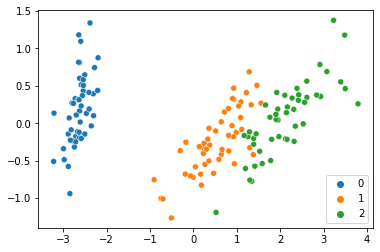

In [ ]:
sns.scatterplot(x_transformed[:, 0], x_transformed[:, 1],
                hue=t, palette=sns.color_palette(n_colors=3))
#次元削減によって可視化できた

In [ ]:
(x_transformed[:, 0])

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978,
        1.28482569,  0.93248853,  1.46430232,  0.18331772,  1.08810326,
        0.64166908,  1.09506066, -0.74912267,  1.04413183, -0.0087454 ,
       -0.50784088,  0.51169856,  0.26497651,  0.98493451, -0.17392537,
        0.92786078,  0.66028376,  0.23610499,  0.94473373,  0.04

In [ ]:
x_transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

主成分分析をする際は必ず標準化(平均を０、分散を１にする)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled#標準化されたもの

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
pca = PCA(n_components=2,random_state=0)#2次元に次元削減

In [ ]:
x_scaled_transformed = pca.fit_transform(x_scaled)#学習と変形(写像)同時に

In [ ]:
pd.DataFrame(x_scaled_transformed, columns=['第一主成分', '第二主成分']).head()

,第一主成分,第二主成分
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [ ]:
pca.explained_variance_ratio_[0]

0.7296244541329987

In [ ]:
pca.explained_variance_ratio_[1]

0.2285076178670178

先ほどに比べてデータの損失が起きている

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


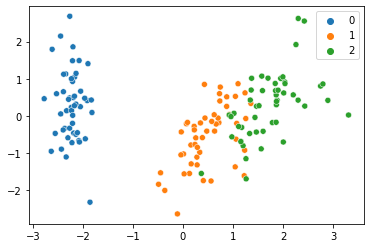

In [ ]:
sns.scatterplot(x_scaled_transformed[:, 0], x_scaled_transformed[:, 1],
                hue=t, palette=sns.color_palette(n_colors=3))
#次元削減によって可視化できた

k-平均法

In [53]:
df = pd.read_csv('convinience_store.csv')
df.head()

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
0,1,25350,3650,8945,0,4867,8945
1,2,24500,0,0,1827,0,0
2,3,23050,5750,11570,0,7667,11570
3,4,22850,4100,10145,0,5467,10145
4,5,22500,0,0,0,0,0


In [55]:
x = df.drop('No',axis=1).values #Noを除いた

In [56]:
x[:3]

array([[25350,  3650,  8945,     0,  4867,  8945],
       [24500,     0,     0,  1827,     0,     0],
       [23050,  5750, 11570,     0,  7667, 11570]])

In [57]:
from sklearn.cluster import KMeans

In [58]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [61]:
kmeans.cluster_centers_.shape

(3, 6)

In [62]:
cluster = kmeans.predict(x)#予測
cluster

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [66]:
df_cluster = df.copy()
df_cluster['cluster'] = cluster

In [67]:
df_cluster.head()

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ,cluster
0,1,25350,3650,8945,0,4867,8945,2
1,2,24500,0,0,1827,0,0,1
2,3,23050,5750,11570,0,7667,11570,2
3,4,22850,4100,10145,0,5467,10145,2
4,5,22500,0,0,0,0,0,1


分類は完成

In [68]:
df_results = pd.DataFrame()
df_results

""


In [70]:
df_cluster[df_cluster['cluster']==0]#cluster==0のみ抽出

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ,cluster
18,19,14500,8775,0,1003,11700,0,0
21,22,10750,0,0,3413,0,0,0
24,25,10600,4363,6695,1860,2908,3348,0
25,26,10200,5125,7970,1350,3417,3985,0
26,27,10000,7375,0,2360,4917,0,0
27,28,9200,7363,0,9420,4908,0,0
28,29,9050,0,8395,0,0,4198,0
29,30,8650,4650,13395,1580,3100,6698,0
30,31,8600,0,3795,0,0,1898,0
31,32,8100,0,7745,1140,0,3873,0


In [72]:
df_cluster[df_cluster['cluster']==0].mean()#平均

No               37.806452
弁当・麺類          5043.548387
飲料             3486.419355
おにぎり・サンドイッチ    7017.741935
スイーツ           2206.000000
カップスープ         2512.903226
サラダ            3509.129032
cluster           0.000000
dtype: float64

In [75]:
df_results['cluster 0'] = df_cluster[df_cluster['cluster']==0].mean().tolist()
df_results['cluster 1'] = df_cluster[df_cluster['cluster']==1].mean().tolist()
df_results['cluster 2'] = df_cluster[df_cluster['cluster']==2].mean().tolist()

In [76]:
df_results

,cluster 0,cluster 1,cluster 2
0,37.806452,46.250000,13.533333
1,5043.548387,28681.250000,17266.666667
2,3486.419355,5637.666667,2730.933333
3,7017.741935,1298.750000,10721.666667
4,2206.000000,1271.000000,590.866667
5,2512.903226,1770.875000,3447.333333
6,3509.129032,716.958333,9851.200000
7,0.000000,1.000000,2.000000


In [79]:
df_results = df_results.set_index(df_cluster.columns)
df_results

,cluster 0,cluster 1,cluster 2
No,37.806452,46.250000,13.533333
弁当・麺類,5043.548387,28681.250000,17266.666667
飲料,3486.419355,5637.666667,2730.933333
おにぎり・サンドイッチ,7017.741935,1298.750000,10721.666667
スイーツ,2206.000000,1271.000000,590.866667
カップスープ,2512.903226,1770.875000,3447.333333
サラダ,3509.129032,716.958333,9851.200000
cluster,0.000000,1.000000,2.000000


In [80]:
df_results.drop(['No','cluster']).T

,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
cluster 0,5043.548387,3486.419355,7017.741935,2206.000000,2512.903226,3509.129032
cluster 1,28681.250000,5637.666667,1298.750000,1271.000000,1770.875000,716.958333
cluster 2,17266.666667,2730.933333,10721.666667,590.866667,3447.333333,9851.200000


↑加工分析後